#### Чтение plasma из Астры

In [2]:
import io
import numpy as np
import pandas as pd
plasma = {}
with open('plasma3.dat') as file:
    chunks = {}
    for l in file.readlines():
        if l.startswith('#'):
            output = io.StringIO()
            chunks[l[1:-1]] = output
        else:
            output.write(l)

    for key, o in chunks.items():     
        o.seek(0)
        df = pd.read_csv(o,  delim_whitespace=True)
        o.close()
        plasma[key] = df




In [3]:
plasma['vars']

,b_tor0,rm,r0,z0
0,7312.35773,22.3,41.026439,0.0


In [4]:
plasma['approx']

,cdl,cly,cgm,cmy
0,0.000000,1.146488,0.000000,0.000000
1,-0.003234,-0.076810,-0.111782,21573.019446
2,0.112645,1.342658,0.808775,-61377.078725
3,0.056639,-1.248010,-1.577026,70730.317284
4,-0.008493,0.766520,1.334394,-29141.771820


In [5]:
n =4
list(range(n-1,-1,-1))

[3, 2, 1, 0]

In [6]:
from Polynom import Polynom

rdata = plasma['radial_data']
approx = plasma['approx']
def fdf(x, c, n):
# вычисление значения полинома 
    p=c[n]
    #dp=0.0
    for j in range(n-1,-1,-1):
        #dp=dp*x+p
        p=p*x+c[j]
    return p
delta_poly = Polynom(approx['cdl'])

fdf(0.4, approx['cdl'].array, 4), np.polyval(approx['cdl'][::-1], 0.4), delta_poly.val(0.4)



(0.020137033061433, 0.020137033061433, 0.020137033061433)

In [7]:
p = np.poly1d([1,1,1,1])
p2 = np.polyder(p)
p2

poly1d([3, 2, 1])

In [8]:
approx['cdl'][::-1]

4   -0.008493
3    0.056639
2    0.112645
1   -0.003234
0    0.000000
Name: cdl, dtype: float64

In [9]:
#from numpy.polynomial.polynomial import Polynomial
#delta_poly = Polynomial(approx['cdl'], [-1,1])
#delta_poly

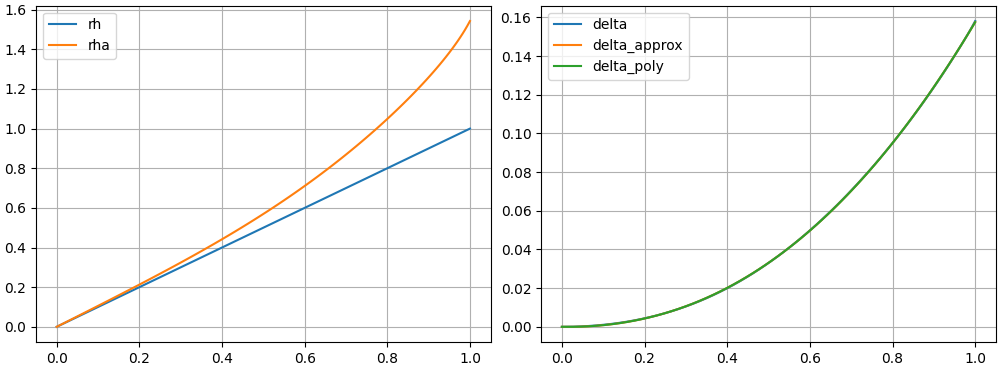

In [10]:
%matplotlib widget

from matplotlib import pyplot as plt

# plot
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 3.7), layout='constrained')
ax1.plot(rdata['rh'], rdata['rh'],  label='rh')
ax1.plot(rdata['rh'], rdata['rha'],  label='rha')
#ax.set_title(r'$\sigma_i=15$')


ax2.plot(rdata['rh'], rdata['delta'],  label='delta')

delta_approx = fdf(rdata['rh'], approx['cdl'].array, 4)
ax2.plot(rdata['rh'], delta_approx,  label='delta_approx')

#x,y = delta_poly.linspace(10)
x = rdata['rh']
y = delta_poly.val(x)
ax2.plot(x, y,  label='delta_poly')
#ax2.plot(rdata['rh'], rdata['gamm'],  label='gamma')

ax1.legend()
ax1.grid(True)
ax2.legend()
ax2.grid(True)

#fig.show()

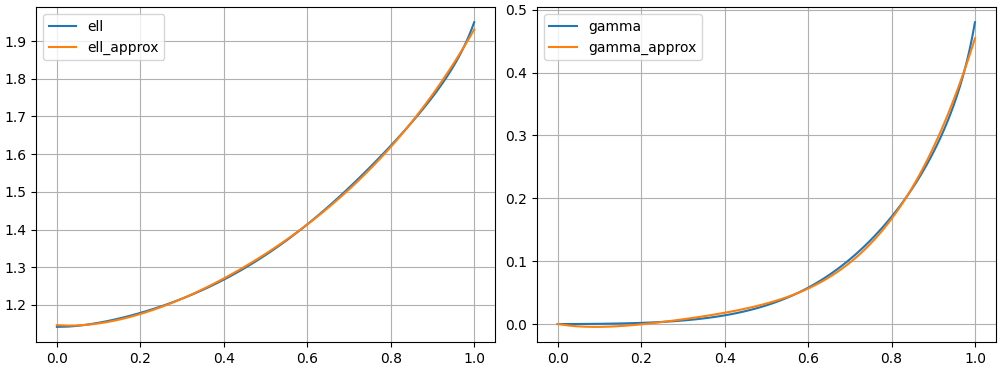

In [11]:
%matplotlib widget

from matplotlib import pyplot as plt

# plot
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 3.7), layout='constrained')

ell_approx = fdf(rdata['rh'], approx['cly'].array, 4)
ax1.plot(rdata['rh'], rdata['ell'],  label='ell')
ax1.plot(rdata['rh'], ell_approx,  label='ell_approx')

gamma_approx = fdf(rdata['rh'], approx['cgm'].array, 4)
ax2.plot(rdata['rh'], rdata['gamm'],  label='gamma')
ax2.plot(rdata['rh'], gamma_approx,  label='gamma_approx')

ax1.legend()
ax1.grid(True)
ax2.legend()
ax2.grid(True)

In [12]:
r0 = plasma['vars']['r0'][0]
rm = plasma['vars']['rm'][0]
z0 = plasma['vars']['z0'][0]
r0, rm, z0

(41.0264392251612, 22.3, 0.0)

In [13]:
import numpy as np

def mag_surf(th, xr, xdl, xly, xgm):
    cotet=np.cos(th)
    sitet=np.sin(th)
    xx=-xdl+xr*cotet-xgm*sitet**2
    zz=xr*xly*sitet
    x=(r0+rm*xx)/100
    z=(z0+rm*zz)/100
    return x,z

    xdl=fdf(xr,cdl,ncoef,xdlp) - delta -  shift as a function of "minor radius":
    
    xly=fdf(xr,cly,ncoef,xlyp) - ell - ellipticity as a function of "minor radius":
    xgm=fdf(xr,cgm,ncoef,xgmp) - gamm - triangularity as a function of "minor radius":
    xmy=fdf(pa,cmy,ncoef,xmyp) - Polinomial approximation of the amy(r) 
                               -  amy=(btor/q)*rho*(drho/dr) is a function of "minor radius" r=rh(i).

In [14]:
index = 78
delta = rdata['delta'][index]
ell = rdata['ell'][index]
gamma = rdata['gamm'][index]
print(delta, ell, gamma)

theta = np.linspace(0, 2*np.pi, 100)
x, z = mag_surf(theta, 1, delta, ell, gamma)


0.158136288123822 1.95000000000064 0.48


In [15]:
index = 78
delta = rdata['delta'][index]
ell = rdata['ell'][index]
gamma = rdata['gamm'][index]
r = rdata['rh'][index]
print(r, delta, ell, gamma)

delta = fdf(r, approx['cdl'].array, 4)
ell = fdf(r, approx['cly'].array, 4)
gamma = fdf(r, approx['cgm'].array, 4)
print(rdata['rh'][index], delta, ell, gamma)

theta = np.linspace(0, 2*np.pi, 100)
xa, za = mag_surf(theta, 1, delta, ell, gamma)
len(za)

1.0 0.158136288123822 1.95000000000064 0.48
1.0 0.15755712580563813 1.9308466288926844 0.4543598929211351


100

In [16]:
from Field import Field
field = Field(plasma)
theta = np.linspace(0, 2*np.pi, 100)
xa2, za2 = field.mag_surf(1.0, theta)

(0.12969828621214313, 0.6204353849581362, -0.47827479086104, 0.47827479086104)

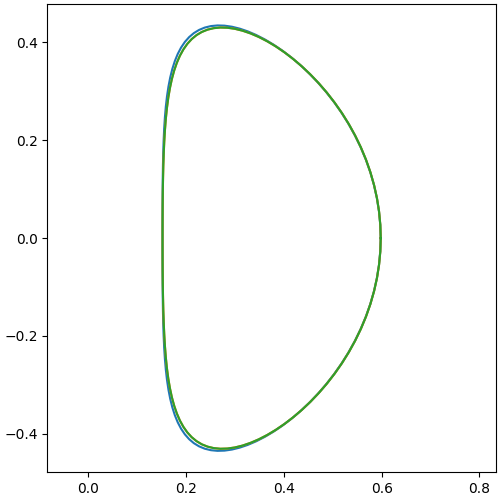

In [17]:
from matplotlib import pyplot as plt
 
# Function to plot
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
ax.plot(x, z)
ax.plot(xa, za)
ax.plot(xa2, za2)
ax.axis('equal')
#fig.show()

(0.13553546202101752,
 0.6174797614758979,
 -0.4581300182090076,
 0.4581300182090076)

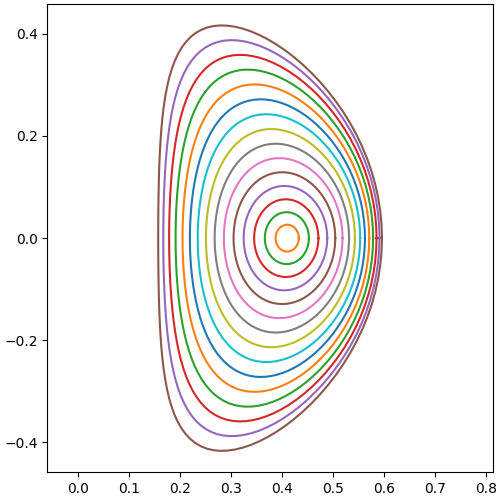

In [18]:
from matplotlib import pyplot as plt
 
# Function to plot
fig, ax = fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
for i in range(0,78,5):
    xr = rdata['rh'][i]
    delta = rdata['delta'][i]
    ell = rdata['ell'][i]
    gamma = rdata['gamm'][i]
    x, z = mag_surf(theta, xr, delta, ell, gamma)
    ax.plot(x, z)
ax.axis('equal')
# function to show the plot
#fig.show()

In [19]:
from Field import Field
field = Field(plasma)

r = np.linspace(0.01, 1.0, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Bt, Bp, Si = field.value(R,P)
X, Y = field.mag_surf(R,P)

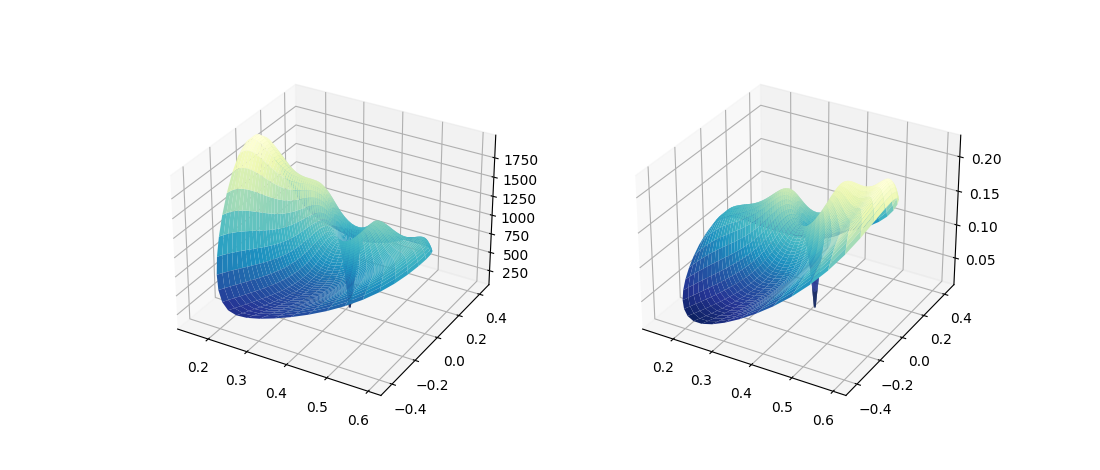

In [20]:
fig = plt.figure(figsize=(11, 4.7),)
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax1.plot_surface(X, Y, Bp, cmap=plt.cm.YlGnBu_r)
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax2.plot_surface(X, Y, Si, cmap=plt.cm.YlGnBu_r)


In [21]:
np.sin(12*np.pi/180)

0.20791169081775931

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Equation of ring cyclide
# see https://en.wikipedia.org/wiki/Dupin_cyclide
import numpy as np

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Bp', 'Sin B'],
                    )

fig.add_trace(go.Surface(x=X, y=Y, z=Bp), 1, 1)
fig.add_trace(go.Surface(x=X, y=Y, z=Si), 1, 2)
fig.update_layout(title_text="Tor")
fig.show()